In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat       # Import function to read data.
data = loadmat('Ch3_d2.mat')
f = data['d']
print(f)

[[0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
np.shape(f)

(1000, 500)

QUESTION 1: CALCULATE AVERAGE NUMBER OF SPIKES PER TRIAL

In [27]:
n_trials = np.shape(f)[0]
T = np.shape(f)[1]
print(n_trials)
print(T)

1000
500


In [28]:
n_spikes_per_trial = np.sum(f,1) 
print(n_spikes_per_trial[0:2])
np.shape(n_spikes_per_trial)

[ 7 14]


(1000,)

In [29]:
n_avg = np.mean(n_spikes_per_trial)
print("The average number of spikes per trial is", n_avg)

The average number of spikes per trial is 12.075


THE AVERAGE FIRING RATE:

In [54]:
duration_of_a_trial_in_seconds = 0.5
avg_firing_rate = n_avg / duration_of_a_trial_in_seconds
print("The average firing rate is", avg_firing_rate, "HZ")

The average firing rate is 24.15 HZ


AVERAGE ISI:

In [55]:
duration_of_a_trial_in_seconds = 0.5
avg_firing_rate = n_avg / duration_of_a_trial_in_seconds
print(avg_firing_rate)

ISI = [];                                   #Empty variable to hold ISIs
for k in range (n_trials):                  #For each trial:
    spike_times = np.where(f[k,:] == 1);    #................ find indices where spikes occur
    isi0 = np.diff(spike_times);            #................ get the difference between indices (ISIs) 
    ISI = np.concatenate([ISI, isi0[0]]);   #................ and append this to list of all ISIs. 

24.15


In [59]:
mean_ISI = np.mean(ISI)
print("The average ISI is", mean_ISI, "s.")

The average ISI is 35.62446952595937 s.


FANO:

In [62]:
fano = np.var(n_spikes_per_trial)/ np.mean(n_spikes_per_trial)
print("The Fano factor is", fano)

The Fano factor is 1.0084782608695653


QUESTION 2: Compute and plot SNH, ISI histogram, and PSTH. Mark the average on each plot.

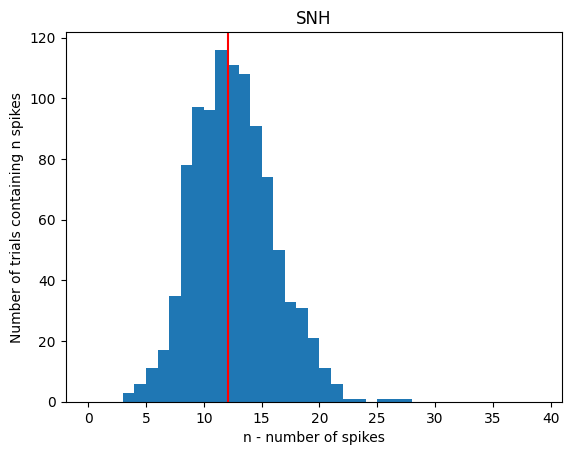

In [47]:
#THE SNH
plt.hist(n_spikes_per_trial, np.arange(40))
plt.xlabel('n - number of spikes')
plt.ylabel('Number of trials containing n spikes')
plt.title('SNH');
plt.axvline(n_avg, color='r');
plt.show()

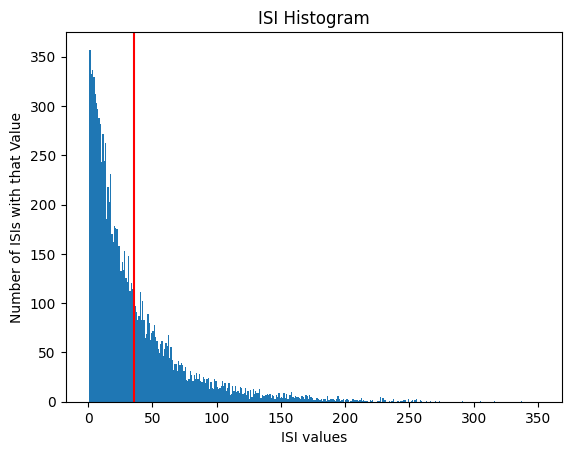

In [46]:
#THE ISI
plt.hist(ISI, np.arange(np.max(ISI))); 
plt.xlabel('ISI values')
plt.ylabel('Number of ISIs with that Value')
plt.title('ISI Histogram')
plt.axvline(mean_ISI, color='r');
plt.show()

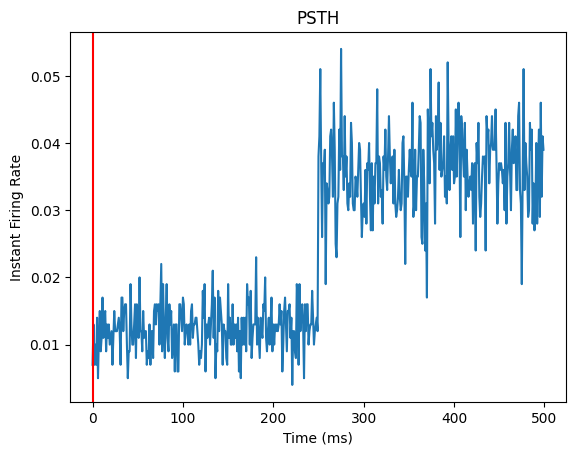

In [51]:
#PSTH
prob_spike = np.sum(f,0)/n_trials; #this will give us the probabiliy of a spike at any moment in time
mean_prob_spike = np.mean(prob_spike)

dt = 00.1 #this is the uhhh time between samples in [s] == 1 ms
instant_firing_rate = prob_spike/dt
plt.plot(prob_spike)
#what is the firing rate approximately? what should the axes be?
plt.xlabel('Time (ms)')
plt.ylabel('Instant Firing Rate')
plt.title('PSTH')
plt.axvline(mean_prob_spike, color='r');

QUESTION 3: Compare Ch3_d1.mat and Ch3_d2.mat